# Machine learning 2025 Student Exam Evaluation


Initialize imports

In [8]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

Load the data and drop unnecessary columns and rows with missing values

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.drop(columns=[
    'Attendance',
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level', 
    'Internet_Access',
    'Tutoring_Sessions',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
    ], inplace=True)  # drop unrelevant columns
df.dropna(inplace=True) # drop rows with missing values
df.head(5)

,Hours_Studied,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
0,23,7,73,3,67
1,19,8,59,4,61
2,24,7,91,4,74
3,29,8,98,4,71
4,19,6,65,4,70


# Data visualization

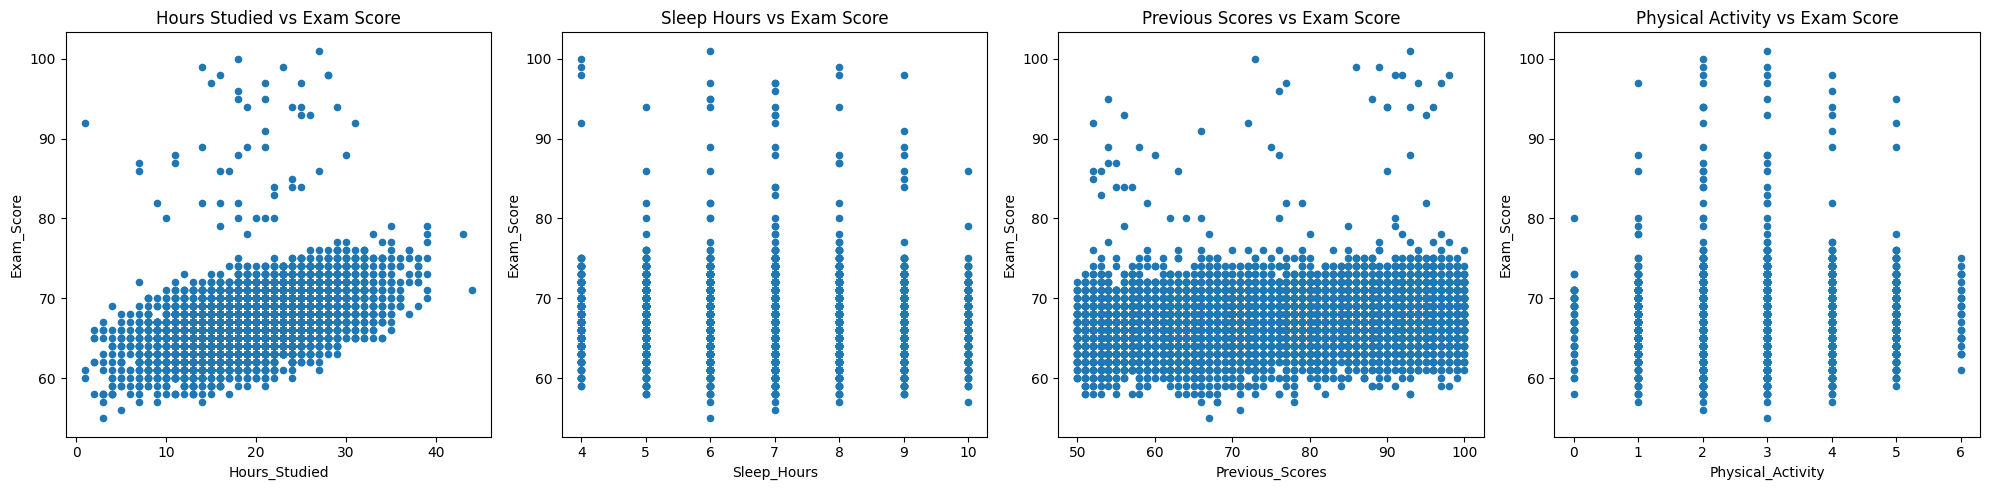

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

df.plot.scatter(x='Hours_Studied', y='Exam_Score', ax=axes[0], title='Hours Studied vs Exam Score')
df.plot.scatter(x='Sleep_Hours', y='Exam_Score', ax=axes[1], title='Sleep Hours vs Exam Score')
df.plot.scatter(x='Previous_Scores', y='Exam_Score', ax=axes[2], title='Previous Scores vs Exam Score')
df.plot.scatter(x='Physical_Activity', y='Exam_Score', ax=axes[3], title='Physical Activity vs Exam Score')

plt.tight_layout()
plt.show()